### 关于数据集 | About Dataset

https://www.kaggle.com/datasets/fivethirtyeight/the-ultimate-halloween-candy-power-ranking/data

#### 背景 | Context

What’s the best (or at least the most popular) Halloween candy?

#### 内容 | Content

在Candy.csv中包含了每种糖果的属性及其排名。对于二元变量，1表示“是”，0表示“否”。

- chocolate: Does it contain Chocolate?
  - 是否含有巧克力
- fruity: Is it fruit flavored?
  - 是否是水果味的？
- caramel: Is there caramel in the candy?
  - 是否含有焦糖？
- peanutalmondy (peanuts, peanut butter, almonds)
  - 花生杏仁类（是否含有花生、花生酱或杏仁？）
- nougat: Does it contain nougat?
  - 是否含有牛轧糖？
- crispedricewafer (crisped rice, wafers, cookie)
  - 脆米威化饼（是否含有脆米、威化饼或饼干成分？）
- hard: Is it a hard candy?
  - 是否坚硬？
- bar: Is it a candy bar?
  - 是否是棒状的？
- pluribus: Is it one of many candies in a bag or box?
  - 是否是一袋或一盒中的一个？
- sugarpercent: The percentile of sugar it falls under within the data set.
  - 含糖量百分比：在数据集中其含糖量所处的百分比区间。
- pricepercent: The unit price percentile compared to the rest of the set.
  - 价格百分比：与该组其他产品相比的单价百分位数。
- winpercent: The overall win percentage according to 269,000 matchups.
  - 胜率：根据26.9万投票得出的总胜率。

---

#### 主要目标 | Paimary objective

- 通过利用不同的分类模型，并结合糖果的附加特征，来预测该糖果是否以巧克力为基础。

- Utilizing a different classification Model to predict whether a candy is Chocolate-based, leveraging its additional features.


---

### 实例

---

In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score


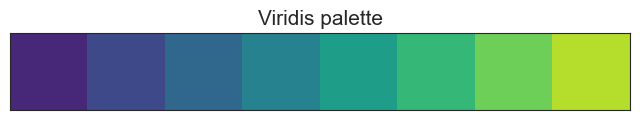

In [304]:
def viridis_palette():
    sns.palplot(sns.color_palette("viridis", 8))
    plt.title("Viridis palette", fontsize = 15)
    plt.show()

viridis_palette()

In [305]:
df = pd.read_csv("Candy.csv")


---

#### 1.数据预处理 | Data Preprocessing

---

In [306]:
df.head().style.background_gradient(cmap = "viridis").hide(axis = "index")

competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
100 Grand,1,0,1,0,0,1,0,1,0,0.732000,0.860000,66.971725
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604000,0.511000,67.602936
One dime,0,0,0,0,0,0,0,0,0,0.011000,0.116000,32.261086
One quarter,0,0,0,0,0,0,0,0,0,0.011000,0.511000,46.116505
Air Heads,0,1,0,0,0,0,0,0,0,0.906000,0.511000,52.341465


In [307]:
df.isnull().sum()


competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

Luckily, we don't have any missing values.

In [308]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


---

#### 2.探索性数据分析 | Exploratory Data Analysis

---

This will be an EXPLORATORY (探索性) visualization, as opposed to EXPLANATORY (解释性).


Rename the columns for better understanding and aesthetics.

In [309]:
mapping = {
    "competitorname": "Candy Name",
    "chocolate": "Chocolate",
    "fruity": "Fruity",
    "caramel": "Caramel",
    "peanutyalmondy": "Peanuts & Nuts",
    "nougat": "Nougat",
    "crispedricewafer": "Crispy",
    "hard": "Hard Candy",
    "bar": "Candy Bar",
    "pluribus": "Multi-piece",
    "sugarpercent": "Sugar Percentage",
    "pricepercent": "Price Percentage",
    "winpercent": "Win Percentage",
}
df = df.rename(columns = mapping)


In [310]:
df.head().style.background_gradient(cmap = "viridis").hide(axis = "index")


Candy Name,Chocolate,Fruity,Caramel,Peanuts & Nuts,Nougat,Crispy,Hard Candy,Candy Bar,Multi-piece,Sugar Percentage,Price Percentage,Win Percentage
100 Grand,1,0,1,0,0,1,0,1,0,0.732000,0.860000,66.971725
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604000,0.511000,67.602936
One dime,0,0,0,0,0,0,0,0,0,0.011000,0.116000,32.261086
One quarter,0,0,0,0,0,0,0,0,0,0.011000,0.511000,46.116505
Air Heads,0,1,0,0,0,0,0,0,0,0.906000,0.511000,52.341465


In [311]:
def plot_choc_candy_ratio(df):
    
    choc_ratio = df["Chocolate"].mean().round(2)
    candy_ratio = 1 - choc_ratio

    fig, ax = plt.subplots(figsize = (8, 2))

    ax.barh([''], [candy_ratio], color = "#472777", alpha = 0.9, label = "Candy")
    ax.barh([''], [choc_ratio], left=[candy_ratio], color = "#35b778", alpha = 0.9, label = "Chocolate")

    ax.annotate(
        f"{int(candy_ratio * 100)}%", 
        xy = (candy_ratio / 2, 0), 
        ha = "center",
        va = "center",
        color = "white", fontsize = 40, fontfamily = "serif"
    )
    ax.annotate(
        f"{int(choc_ratio * 100)}%",
        xy = (candy_ratio + choc_ratio / 2, 0),
        ha = "center",
        va = "center",
        color = "white", fontsize = 40, fontfamily = "serif"
    )

    ax.set_title("Candy & Chocolate", fontsize = 20, fontweight = "bold", fontfamily = "serif")
    ax.axis('off')
    ax.set_xlim(0, 1)
    ax.legend(loc = "upper center", fontsize = 15, bbox_to_anchor=(0.5, -0.15), ncol=2)

    plt.tight_layout()
    plt.show()


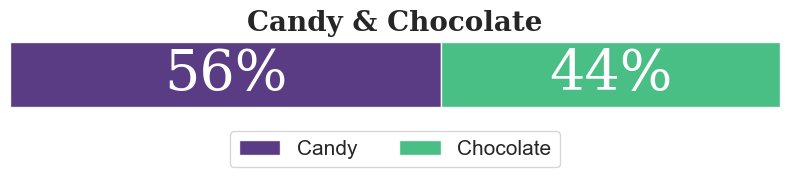

In [312]:
plot_choc_candy_ratio(df)


Exploring Data Connections: Correlation Heatmap

Let's delve into the relationships between variables and uncover factors influencing our analysis

In [313]:
def plot_correlation_heatmap(df):

    df_numeric = df.select_dtypes(include = ["number"])

    corr = df_numeric.corr()

    mask = np.triu(np.ones_like(corr, dtype = bool))

    plt.figure(figsize = (10, 8))

    cmap = sns.color_palette("viridis", as_cmap = True)

    sns.heatmap(
        corr, mask = mask, cmap = cmap,
        vmax = .4, vmin = -.4, center = 0,
        square = True, linewidths = 1,
        annot = True,
        fmt = ".2f",
        cbar_kws = {"shrink": .8}
    )

    plt.title("Correlation Heatmap", fontsize = 20, fontweight = "bold", fontfamily = "serif")
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()


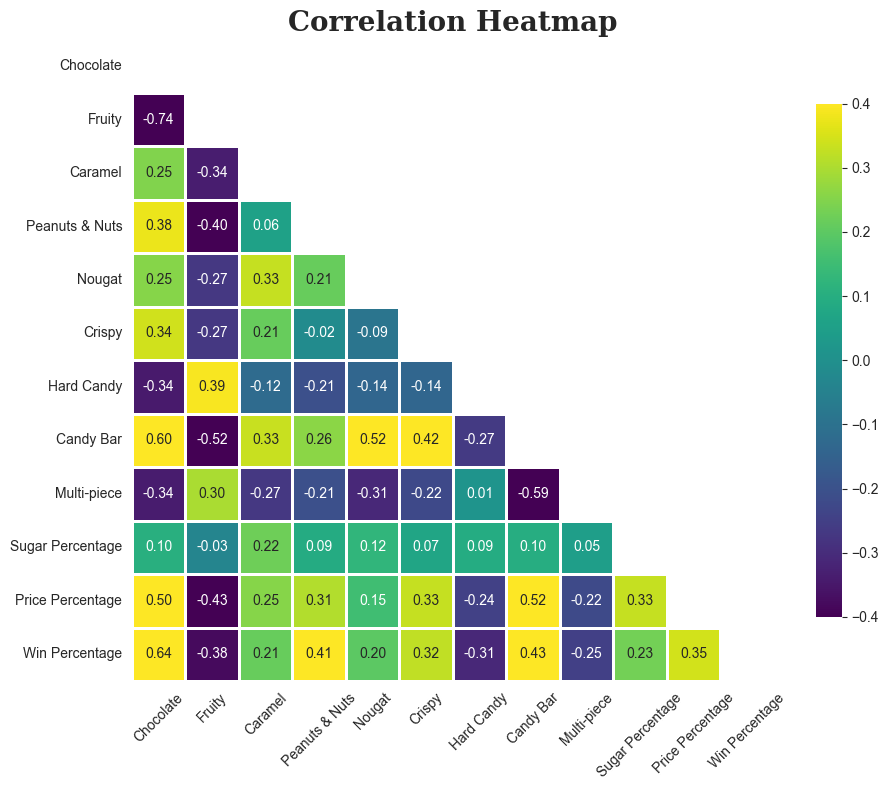

In [314]:
plot_correlation_heatmap(df)


---

##### 观察 | Observation

**正相关关系：**  
- 巧克力与糖果棒之间存在强正相关  
  - 巧克力与糖果棒之间的强正相关系数表明，人们更倾向于选择以糖果棒形式存在的巧克力。

**中等相关性：**  
- 价格和胜率与巧克力及糖果棒呈中等程度正相关：  
  - 这表明较高的价格和更高的受欢迎程度（胜率）通常与这两类产品相关。  
    - 这说明高端或高品质的巧克力产品（如糖果棒）可能定价更高，并更受消费者欢迎。

**负相关关系：**  
- 水果味与巧克力呈负相关，表明水果味产品较少以巧克力形式出现。  
- 多件装与糖果棒呈负相关，说明糖果棒通常不是多件包装形式。  
- 同样，硬糖与糖果棒呈负相关，表明糖果棒不太可能是硬糖类型。

**弱相关性：**  
- 一些特征（如牛轧糖和含糖量百分比）与其他特征之间的相关性较弱，表明它们对巧克力或糖果棒的存在与否影响较小。

---

**Positive Correlation:**
- Strong Positive Correlation between Chocolate and Candy bar
  - The strong positive correlation coefficient between Chocolate with bar suggests that people perfer the chocolates which are more likely to be bars.

**Moderate Positive Correlation:**
- Moderate Correlation of Price and Win Percentage with Chocolate and Candy bar:
  - This indicate that higher prices and win percentages are associated with these product categories.
    - This suggests that premium or high-quality chocolate products, such as candy bars, may command higher prices and popular among consumers.

**Negative Correlation:**
- Fruity Flavor shows a negative correlation with Chocolate, indicating that fruity-flavored products are less likely to be chocolates.
- Multi-piece has a negative correlation with Candy bar, suggesting that candy bars are less likely to come in multiple pieces.
- Similarly, Hard Candy has a negative correlation with Candy bar, indicating that candy bars are less likely to be hard candies.

**Weak Correlations:**
- Some features, such as Nougat and Sugar Percentage, have weak correlations with other features, suggesting that they may not strongly influence the presence of chocolate or candy bars.

---

**分析糖果的各种二元属性（如是否含巧克力、是否有坚果等）对胜率的影响**，量化每个属性对糖果获胜概率的贡献度。

**核心原理：**
基于 "平均胜率差异" 的统计方法。
1. 计算所有糖果的 **整体平均胜率（基准值）**
2. 对于每个属性：
   - 筛选出 **具有该属性（值为1）** 的糖果子集
   - 计算这些糖果的 **平均胜率**
   - 对比基准： $$\text{属性影响值} = \text{属性平均胜率} - \text{整体平均胜率}$$
3. 正值表示该属性 **提升胜率**，负值表示 **降低胜率**

In [315]:
def analyze_win_factors(df):
    """
    分析哪些属性对糖果胜率有贡献
    
    参数:
    df (DataFrame): 包含糖果属性和胜率的数据集
    
    返回:
    DataFrame: 展示属性对胜率影响的图表和数据
    """
    # 计算整体平均胜率作为基准
    overall_avg = df["Win Percentage"].mean()
    result_data = []

    # 获取所有属性列，跳过名称列
    attributes = [col for col in df.columns if col != "Candy Name"]

    for attr in attributes:
        
        # 跳过非二元属性（除了胜率本身）
        if df[attr].dtype != "int64" and attr != "Win Percentage":
            continue

        # 对于二元属性，计算当属性存在时( = 1)的影响
        if df[attr].isin([0, 1]).all():

            # 获取具有该属性的糖果
            filtered = df[df[attr] == 1]

            # 如果没有糖果具有此属性，则跳过
            if len(filtered) == 0:
                continue

            # 计算具有该属性的糖果的平均胜率和影响值
            avg_win = filtered["Win Percentage"].mean()
            impact = avg_win - overall_avg

            result_data.append({
                "Attribute": attr,
                "Avg Win %": round(avg_win, 2),
                "Impact %": round(impact, 2)
            })
    
    # 创建结果数据框并按影响值排序
    result_df = pd.DataFrame(result_data)
    result_df = result_df.sort_values("Impact %", ascending = False)

    plt.figure(figsize = (14, 8))

    bars = plt.barh(
        result_df["Attribute"],
        result_df["Impact %"],
        color = plt.cm.viridis(np.linspace(0, 0.8, len(result_df)))
    )

    for bar in bars:
        width = bar.get_width()
        label_x_pos = width if width > 0 else width
        align = "left" if width > 0 else "right"
        plt.text(
            label_x_pos,
            bar.get_y() + bar.get_height() / 2,
            f"{"+" if width > 0 else ""}{width:.2f}",
            va = "center",
            ha = align
        )
    
    plt.axvline(x = 0, color = "black", linestyle = "-", alpha = 1)
    plt.xlabel("Impact on Win Percentage (%)", fontsize = 15, fontfamily = "serif")
    plt.title("Attribute Impact on Win Percentage (%)", fontsize = 20, fontweight = "bold", fontfamily = "serif")

    plt.tight_layout()
    plt.show()
    
    print(f"The overall average win percentage is {overall_avg:.2f}%")

    return result_df


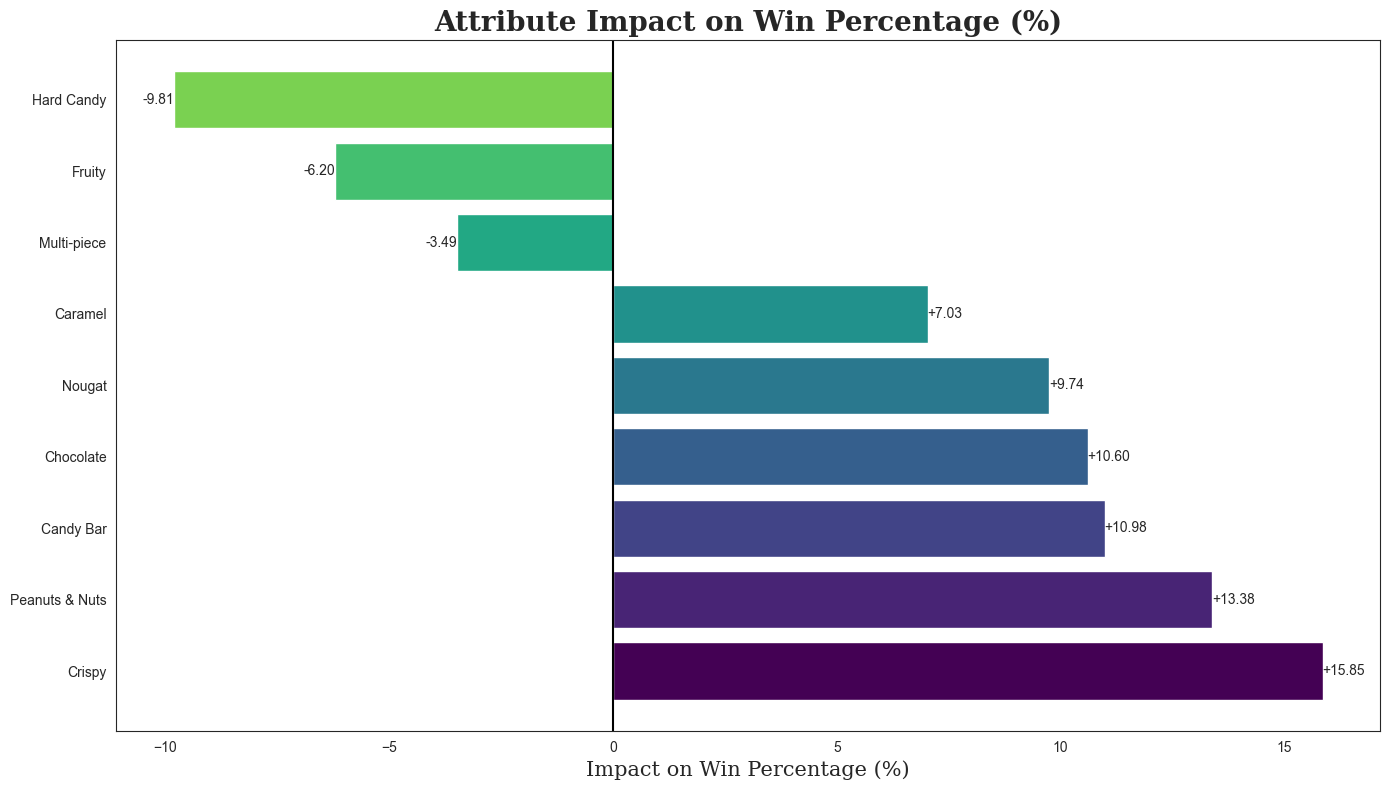

The overall average win percentage is 50.32%


In [316]:
result_df = analyze_win_factors(df)


In [317]:
result_df


,Attribute,Avg Win %,Impact %
5,Crispy,66.17,15.85
3,Peanuts & Nuts,63.70,13.38
7,Candy Bar,61.30,10.98
0,Chocolate,60.92,10.60
4,Nougat,60.05,9.74
2,Caramel,57.35,7.03
8,Multi-piece,46.82,-3.49
1,Fruity,44.12,-6.20
6,Hard Candy,40.51,-9.81


---

##### 观察 | Observation

上表生动地揭示了不同糖果成分如何影响其在大众中的受欢迎程度。
- 巧克力糖果一马当先，可将其胜率大幅提升约10个百分点。
- 糖果棒和含坚果的甜点紧随其后，同样带来显著优势。
- 令人意外的是，含有威化或米花的酥脆糖果效果最为突出，可将胜率提高近16个百分点。
- 焦糖和牛轧糖虽为风味增色不少，但多件装糖果却难以维持吸引力。
- 水果味糖果则面临较大阻力，会明显拉低胜率，而硬糖的劣势最为明显。

然而，真正的秘诀在于成分的组合。以广受欢迎的士力架为例——它融合了巧克力、花生、焦糖和牛轧糖，打破了单一成分的局限，实现了超过70%的超高胜率。

这提醒我们，在糖果的世界里，制胜关键不仅在于使用了哪些原料，更在于它们如何巧妙结合，创造出令人无法抗拒的美味体验。

---

The table above paints a fascinating picture of how different candy ingredients affect their chances of winning over the crowd. 
- Chocolate candies lead the pack, giving a solid boost of around 10 points to their win percentage. 
- Candy bars and nutty treats follow closely, offering a sweet advantage. 
- Surprisingly, crispy candies with wafers or rice pack the biggest punch, lifting win percentage by nearly 16 points. 
- While Caramel and Nougat add some flavor to the mix, multi-piece candies struggle to maintain momentum. 
- Fruit-flavored candies face a tough crowd, dragging down win percentage, while Hard candy candies take the biggest hit. 

But the real magic lies in combinations. Consider the beloved Snickers—its blend of Chocolate, peanuts, Caramel, and Nougat defies expectations, delivering a win rate of over 70%. 
 
It's a reminder that in the world of candy, it's not just about the ingredients but how they come together to create something truly irresistible.

---

In [318]:
df.columns

Index(['Candy Name', 'Chocolate', 'Fruity', 'Caramel', 'Peanuts & Nuts',
       'Nougat', 'Crispy', 'Hard Candy', 'Candy Bar', 'Multi-piece',
       'Sugar Percentage', 'Price Percentage', 'Win Percentage'],
      dtype='object')

In [319]:
# 整个数据集中有85种不同名字的糖果，这里调整top_n的值来显示更多的糖果。
def plot_candy_ranking(ranked_df, top_n = 10):
    """
    绘制糖果胜率排名图表
    
    参数:
    ranked_df (DataFrame): 包含排名的DataFrame
    top_n (int): 显示前N名糖果，默认为10
    """
    # 提取前N名数据
    top_candies = ranked_df.nlargest(top_n, "Win Percentage")

    plt.figure(figsize = (10, 8))

    bars = plt.barh(
        top_candies["Candy Name"],
        top_candies["Win Percentage"],
        color = plt.cm.viridis(np.linspace(0.2, 0.8, top_n))
    )

    for i, bar in enumerate(bars):
        width = bar.get_width()
        rank = i + 1
        plt.text(
            width + 1,
            bar.get_y() + bar.get_height() / 2,
            f"#{rank} - {width:.1f}%",
            va = "center",
            ha = "left",
            fontsize = 12
        )

    plt.title("Top Candy Winners", fontsize = 20, fontweight = "bold")
    plt.xlabel("Win Percentage", fontsize = 20)
    plt.xlim(0, top_candies["Win Percentage"].max() * 1.2)
    plt.gca().invert_yaxis()
    plt.grid(axis = "x", linestyle = "--", alpha = 0.7)

    plt.tight_layout()
    plt.show()


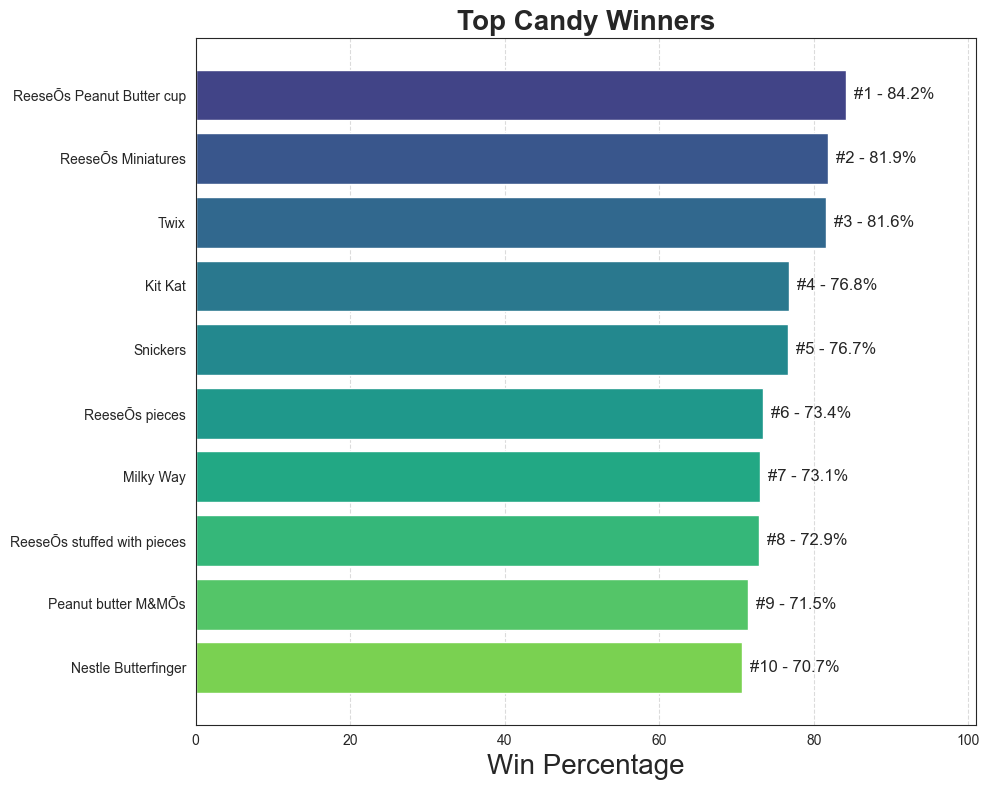

In [320]:
plot_candy_ranking(df)


---

##### 观察 | Observation

- 瑞斯花生酱杯（Reese’s Peanut Butter Cups）及其变体在排行榜中占据主导地位，包揽了前十名中的四个席位。
凭借高达84.2%的胜率，瑞斯花生酱杯稳居最受欢迎糖果宝座，充分展现了其广泛的受欢迎程度。

- 特趣（Twix）以81.6%的胜率在榜单中表现强劲，凸显其持久的魅力和独特的风味组合。
尽管竞争激烈，特趣仍是糖果爱好者心中的顶级选择之一。

- 奇巧（Kit Kat）稳居前五，胜率达到76.8%。
这款以标志性威化夹心巧克力棒闻名的产品，凭借其经久不衰的吸引力，持续赢得全球消费者的青睐。

- 士力架（Snickers）以76.7%的胜率跻身最受欢迎糖果之列，巩固了其经典常青的地位。
其融合牛轧糖、焦糖和花生的美味组合，确保了消费者长期不变的忠诚度。

---

- Reese's Peanut Butter Cups and their variants dominate the top ranks, securing four out of the top ten positions.
With an impressive win rate of 84.2%, Reese's Peanut Butter Cups stand as the undisputed favorite, showcasing their widespread popularity.

- Twix maintains a strong presence in the rankings with a win rate of 81.6%, highlighting its enduring appeal and unique flavor profile.
Despite tough competition, Twix remains a top contender among candy enthusiasts.

- Kit Kat holds its ground in the top five, boasting a solid win rate of 76.8%.
Known for its iconic wafer-filled candy bars, Kit Kat continues to captivate consumers worldwide with its timeless appeal.

- Snickers secures its spot among the favorites with a win rate of 76.7%, underscoring its status as a perennial classic.
Its delightful combination of nougat, caramel, and peanuts ensures unwavering consumer loyalty.


---

In [321]:
# () {}
def plot_binary_distribution(df):
    """
    自动绘制数据集中所有二元特征的分布图
    
    参数:
    df (DataFrame): 包含二元特征的数据集
    features (list): 要可视化的特征列表
    """
    binary_features = [col for col in df.columns if set(df[col].unique()) == {0, 1}]

    if not binary_features:
        print(f"There are no binary features in the dataset.")
        return
    
    colors = {"Yes": "#845ec2", "No": "#c34a36"}

    n_cols = 3
    n_rows = (len(binary_features) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize = (15, 3 * n_rows))
    axes = axes.flatten()
    
    for i, feature in enumerate(binary_features):

        ax = axes[i]
        
        sns.countplot(
            x = df[feature].map({1: "Yes", 0: "No"}),
            order = ["Yes", "No"],
            ax = ax,
            hue = df[feature].map({1: "Yes", 0: "No"}),
            palette = colors,
            width = 0.5,
            legend = False
        )

        total = len(df)
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(
                f"{height / total:.1%}",
                (p.get_x() + p.get_width() / 2, height),
                ha = "center",
                va = "bottom",
                fontsize = 10,
            )

        ax.set_title("")
        ax.set_xlabel(feature, fontsize = 15)
        ax.set_ylabel("")
        ax.set_yticks([])
        sns.despine(ax = ax, left = True)  # 移除左侧边框

    plt.suptitle("Ingredients that define its a candy or chocolate", fontsize = 20, fontweight = "bold", fontfamily = "sans-serif")

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    
    plt.show()


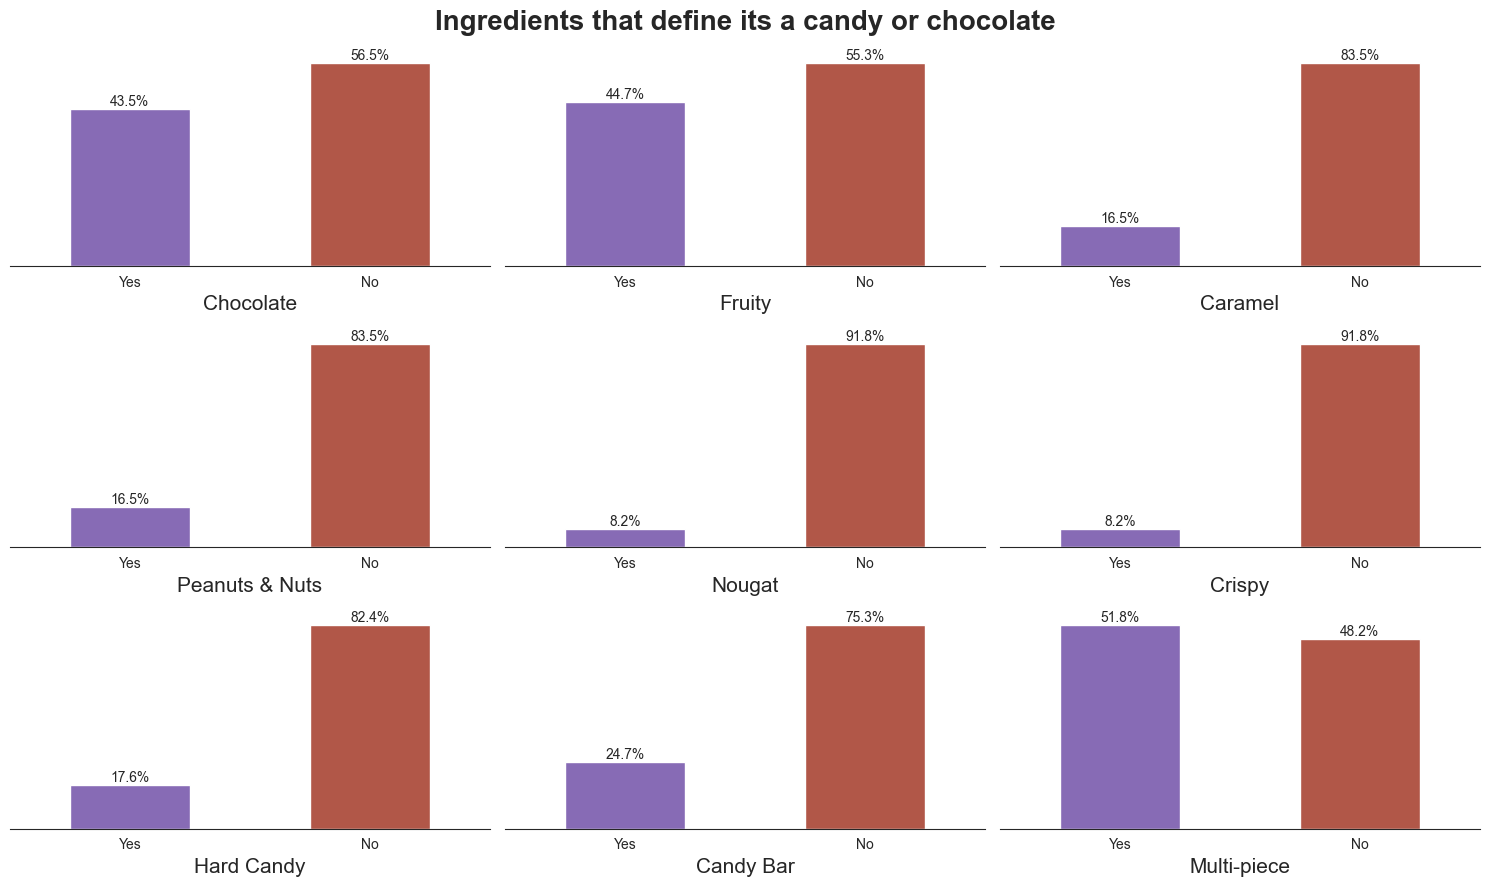

In [322]:
plot_binary_distribution(df)


In [323]:
def plot_sugar_comparison(df):
    """
    绘制巧克力与糖果的糖分分布对比图
    
    参数:
    df (DataFrame): 包含糖分和巧克力信息的数据集
    """
    df_sugar = df[["Sugar Percentage", "Chocolate"]].copy()
    df_sugar["Sugar Percentage"] = df_sugar["Sugar Percentage"] * 100

    plt.figure(figsize = (8, 5))

    colors = {1: "#451e03", 0: "#fc6603"}
    labels = {1: "Chocolate", 0: "Candy"}

    # 绘制分布图
    for chocolate in [1, 0]:

        subset = df_sugar[df_sugar["Chocolate"] == chocolate]

        # 核密度估计（Kernel Density Estimation, KDE）
        sns.kdeplot(
            subset["Sugar Percentage"],
            color = colors[chocolate],
            fill = True,    # 填充曲线下方区域
            alpha = 0.7,    # 填充透明度
            label = labels[chocolate],
            edgecolor = "black"
        )

    # 计算并添加均值线
    for chocolate in [1, 0]:
        
        mean_val = df_sugar[df_sugar["Chocolate"] == chocolate]["Sugar Percentage"].mean()
        
        plt.axvline(mean_val, color = colors[chocolate], linestyle = "--")
        plt.text(
            mean_val + (7 if chocolate == 1 else -7),
            0.005,
            f"Mean: {mean_val:.1f}%",
            fontsize = 12,
            color = colors[chocolate],
            ha = "center",
            bbox = dict(facecolor = "#f5f5f1", alpha = 0.7, pad = 3, edgecolor = "black")
        )

    plt.xticks(np.arange(0, 101, 10))
    plt.xlim(0, 100)
    plt.tick_params(left = False, labelleft = False)    # 隐藏左侧刻度线和标签
    sns.despine(left = True, top = True, right = True)  # 移除左侧、顶部和右侧的图表边框

    plt.title("Which has more sugar?", fontsize = 20, fontweight = "bold", fontfamily = "serif")
    plt.legend()
    plt.tight_layout()
    plt.show()


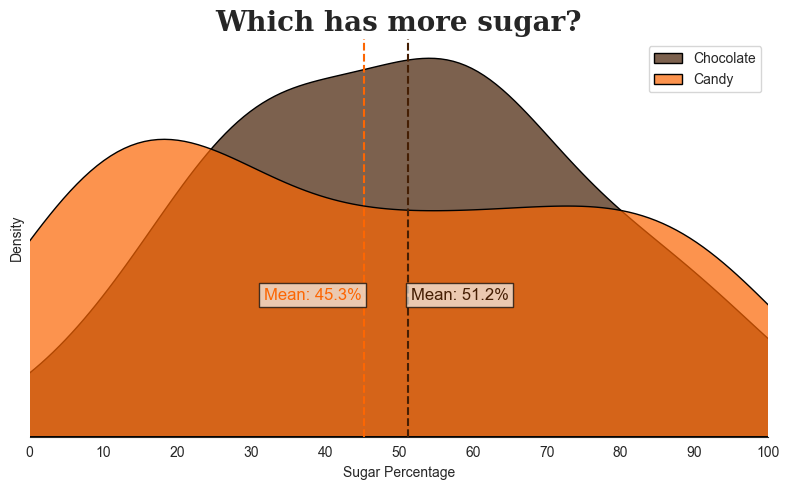

In [324]:
plot_sugar_comparison(df)


---

##### 观察 | Observation

平均来说，巧克力的含糖量要比糖果略高。
对比糖果，巧克力的含糖分布更偏中心化。
糖果的含糖量百分比范围更广，表明其糖分含量的差异性比巧克力更大。

On average, chocolates contain slightly more sugar than candies.
Chocolates tend to have a more concentrated distribution compared to candies.
Candy bars have a wider range of sugar percentages, indicating a greater variability in sugar content compared to chocolates.

---

In [325]:
def plot_price_comparison(df):
    """
    绘制巧克力与糖果的价格分布对比图
    
    参数:
    df (DataFrame): 包含糖分和巧克力信息的数据集
    """
    df_sugar = df[["Price Percentage", "Chocolate"]].copy()
    df_sugar["Price Percentage"] = df_sugar["Price Percentage"] * 100

    plt.figure(figsize = (8, 5))

    colors = {1: "#451e03", 0: "#fc6603"}
    labels = {1: "Chocolate", 0: "Candy"}

    # 绘制分布图
    for chocolate in [1, 0]:

        subset = df_sugar[df_sugar["Chocolate"] == chocolate]

        # 核密度估计（Kernel Density Estimation, KDE）
        sns.kdeplot(
            subset["Price Percentage"],
            color = colors[chocolate],
            fill = True,    # 填充曲线下方区域
            alpha = 0.7,    # 填充透明度
            label = labels[chocolate],
            edgecolor = "black"
        )

    # 计算并添加均值线
    for chocolate in [1, 0]:
        
        mean_val = df_sugar[df_sugar["Chocolate"] == chocolate]["Price Percentage"].mean()

        plt.axvline(mean_val, color = colors[chocolate], linestyle = "--")
        plt.text(
            mean_val + (7 if chocolate == 1 else -7),
            0.005,
            f"Mean: {mean_val:.1f}%",
            fontsize = 12,
            color = colors[chocolate],
            ha = "center",
            bbox = dict(facecolor = "#f5f5f1", alpha = 0.7, pad = 3, edgecolor = "black")
        )

    plt.xticks(np.arange(0, 101, 10))
    plt.xlim(0, 100)
    plt.tick_params(left = False, labelleft = False)    # 隐藏左侧刻度线和标签
    sns.despine(left = True, top = True, right = True)  # 移除左侧、顶部和右侧的图表边框

    plt.title("Which has more price?", fontsize = 20, fontweight = "bold", fontfamily = "serif")
    plt.legend()
    plt.tight_layout()
    plt.show()


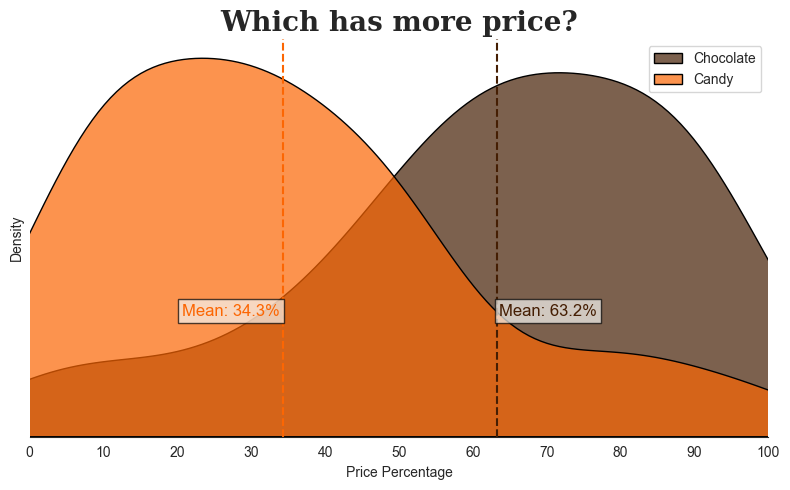

In [326]:
plot_price_comparison(df)


---

##### 观察 | Observation

巧克力的价格普遍更高，平均价格百分比为63.22%，而糖果的平均价格百分比约为34.30%。

巧克力的价格通常更为稳定，而糖果的价格则表现出更大的多样性。

尽管存在差异，但巧克力和糖果在定价灵活性方面相似，标准差分别为巧克力25.10%、糖果24.59%。

Chocolates generally cost more, with an average price percentage of 63.22%, while candies average around 34.30%.

Chocolates tend to stick to a more steady pricing, on the other hand, candies show more variety.

Despite the differences, both chocolates and candies share a similar pricing flexibility, with standard deviations of 25.10% for chocolates and 24.59% for candies.

---

In [327]:
def plot_sugar_price_relationship(df):
    """
    绘制糖分与价格关系图（按是否含有巧克力分组）
    
    参数:
    df (DataFrame): 包含糖分、价格和是否含有巧克力信息的数据集
    """
    color_map = {0: "#fc6603", 1: "#451e03"}
    marker_map = {0: "x", 1: "o"}
    label_map = {0: "No", 1: "Yes"}

    g = sns.lmplot(
        data = df,
        x = "Sugar Percentage",
        y = "Price Percentage",
        hue = "Chocolate",
        palette = color_map,
        markers = [marker_map[0], marker_map[1]],
        height = 8,
        aspect = 0.9,
        legend = False,
    )

    g.set_axis_labels("Sugar Percentile", "Price Percentile")
    plt.title("Comparing Sugar- and Price-percentiles Between Chocolate vs. Non-Chocolate Candies", fontsize = 20, fontweight = "bold", fontfamily = "serif")

    legend_elements = [
        plt.Line2D(
            [0], [0], marker = marker_map[0],
            color = "w",
            markerfacecolor = "w",
            markeredgecolor = color_map[0],
            markersize = 10,
            label = label_map[0]
        ),
        plt.Line2D(
            [0], [0], marker = marker_map[1],
            color = "w",
            markerfacecolor = color_map[1],
            markersize = 10,
            label = label_map[1]
        )
    ]

    plt.legend(
        handles = legend_elements,
        title = "Contains Chocolate?",
        loc = "center right",
        bbox_to_anchor = (1.25, 0.5)
    )

    g.figure.subplots_adjust(right = 0.5)

    plt.tight_layout()
    plt.show()



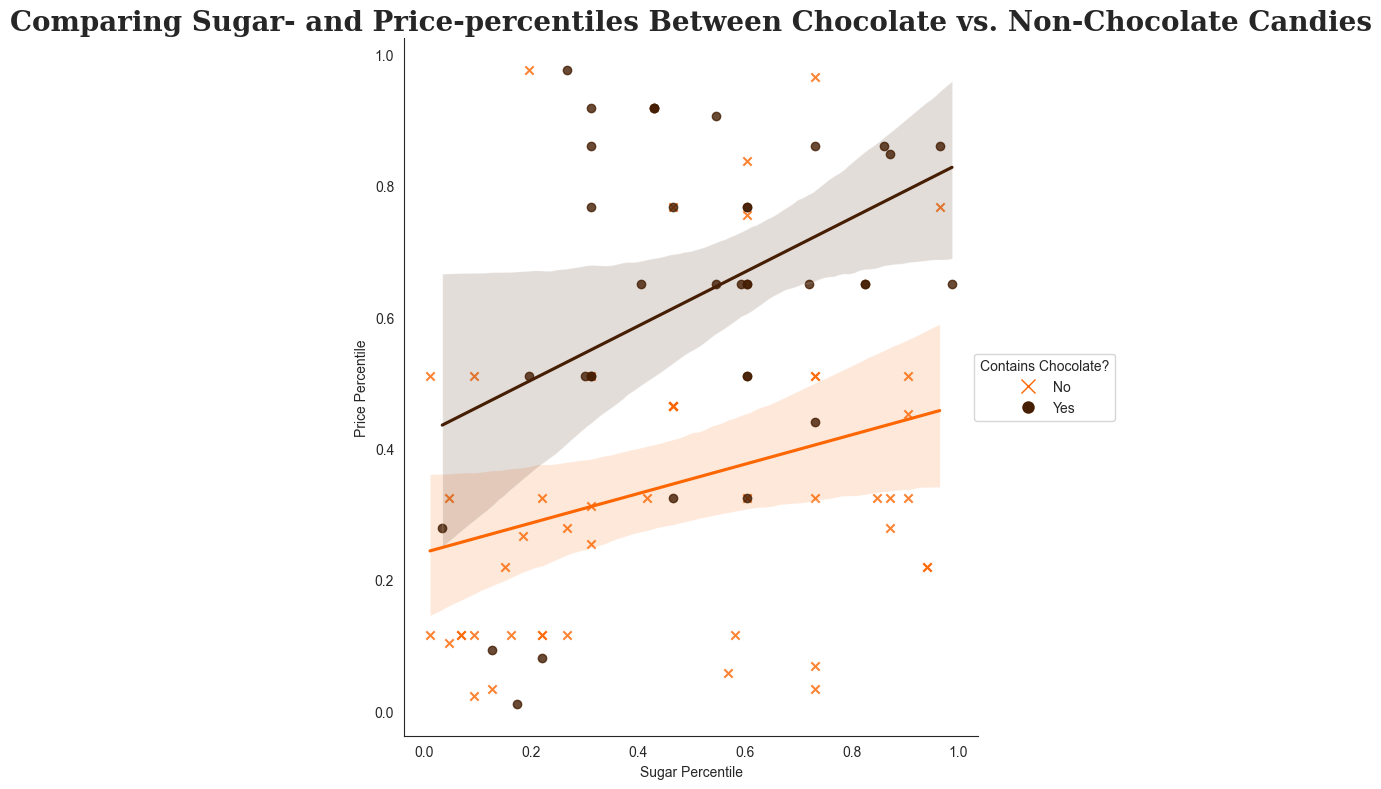

In [328]:
plot_sugar_price_relationship(df)


---

##### 观察 | Observation

It appears to be pretty clear that chocolate candy has a higher sugar & price percentage.

---

In [329]:
def plot_feature_distribution(df):
    """
    分别绘制是否含巧克力的特征分布对比图
    
    参数:
    df (DataFrame): 包含糖果特征的数据集
    """
    sns.set_style("white")

    fig, axes = plt.subplots(2, 3, figsize = (15, 8))
    features = ["Sugar Percentage", "Price Percentage", "Win Percentage"]
    colors = ["#229337", "#0081ff"]
    titles = ["Sugar Percentage", "Price Percentage", "Win Percentage"]

    for row, chocolate in enumerate([0, 1]):
        for col, feature in enumerate(features):
            ax = axes[row, col]

            sns.histplot(
                df[df["Chocolate"] == chocolate],
                x = feature,
                kde = True,
                color = colors[chocolate],
                edgecolor = "black",
                linewidth = 2,
                alpha = 0.8,
                ax = ax,
            )

            ax.set_title(f"Distribution of {titles[col]} ({["Candies", "Chocolate"][chocolate]})", fontsize = 15)
            sns.despine(ax = ax, left = True, top = True, right = True)
            ax.tick_params(left = False, labelleft = False)
            ax.set_ylabel("")
            ax.set_xlabel("")

    plt.suptitle("Candy Features Distribution: Chocolate vs. Non-Chocolate", fontsize = 20, fontweight = "bold", fontfamily = "serif")
    plt.tight_layout()
    plt.show()


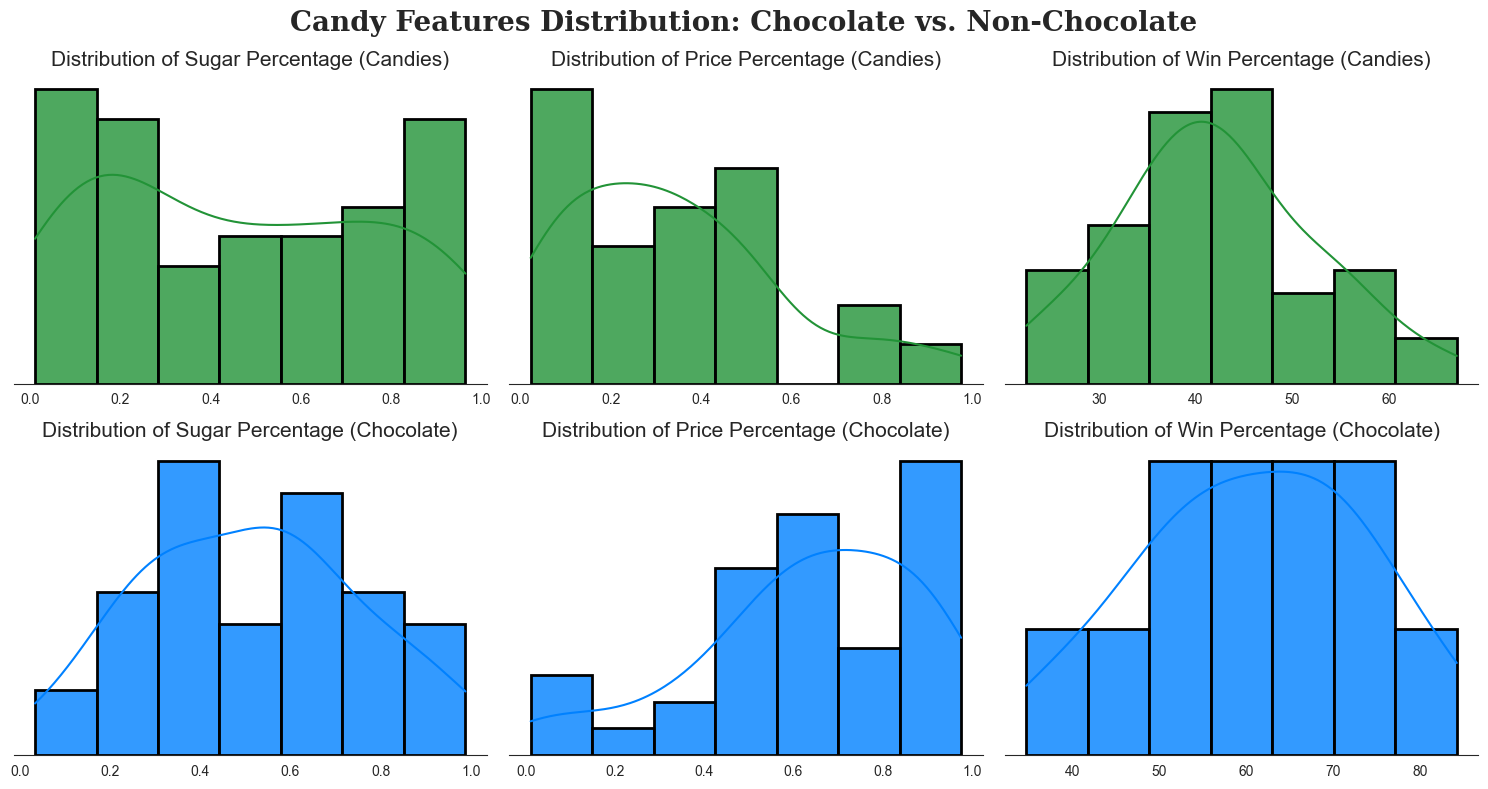

In [330]:
plot_feature_distribution(df)


---

##### 观察 | Observation

对比分布表明，含巧克力的糖果通常比不含巧克力的糖果价格更高、胜率也更高。然而，含巧克力的糖果在胜率上的差异较小，表现出更稳定的受欢迎程度；而不含巧克力的糖果在胜率上则表现出更大的波动性。

The comparative distribution suggest that candies with chocolate tend to have higher prices and win percentages compared with candies without chocolate. However, there's less variability in win perventage among candies with chocolate, while candies without chocolate exhibit more variability.

---

In [331]:
def plot_feature_boxplots(df):
    """
    绘制糖果特征箱线图对比
    
    参数:
    df (DataFrame): 包含糖果特征的数据集
    """
    features = ["Sugar Percentage", "Price Percentage", "Win Percentage"]
    df_plot = df[features + ["Chocolate"]].copy()
    df_plot["Type"] = df_plot["Chocolate"].map({0: "Candy", 1: "Chocolate"})

    colors = {"Chocolate": "#ae29c4", "Candy": "#0089ff"}

    fig, axes = plt.subplots(1, 3, figsize = (15, 5))

    for i, feature in enumerate(features):
        
        sns.boxplot(
            data = df_plot,
            x = "Type",
            y = feature,
            hue = "Type",
            ax = axes[i],
            palette = colors,
            width = 0.6,
            legend = False
        )

        axes[i].set_title(f"Distribution of {feature}", fontsize = 15)
        sns.despine(ax = axes[i], top =  True, right = True)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")

    plt.suptitle("Candy vs. Chocolate Features Comparison", fontsize = 20, fontweight = "bold", fontfamily = "serif")
    plt.tight_layout()
    plt.show()


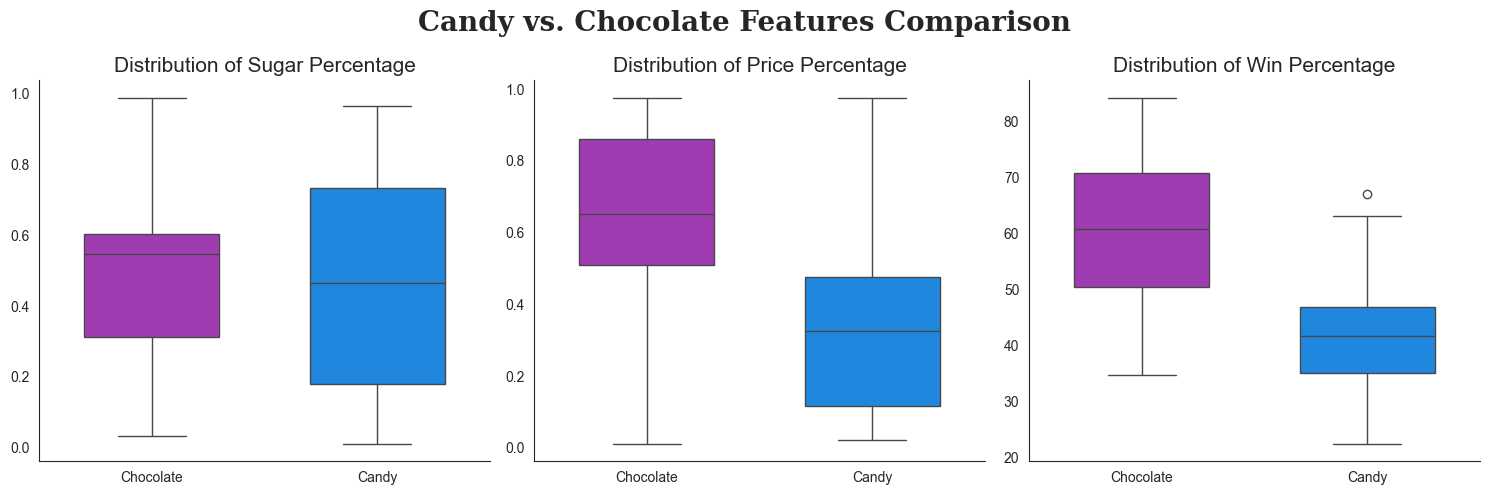

In [332]:
plot_feature_boxplots(df)


---

##### 观察 | Observation

箱形图展示了含巧克力与不含巧克力糖果在含糖量、价格和胜率百分比上的分布情况。
- 在含糖量方面，两组的中位数均接近0.5，较为相似，但不含巧克力的糖果（chocolate = 0）的四分位距（IQR）略宽。
- 在价格百分比方面，含巧克力的糖果中位数更高（约0.6），且四分位距更宽。
- 此外，两组在价格百分比上均存在离群值，其中不含巧克力的糖果出现了更多极端值。
- 在胜率百分比方面，含巧克力的糖果中位数明显更高（约60.8）。不含糖的糖果四分位距更窄，表明其整体表现更稳定、一致性更强。

The box plot illustrate the distribution of sugar, price, and win percentages for candies with or without chocolate.
- For sugar percentage, both groups show similar median values around 0.5, with a slightly wider interquartile range (IQR) for candies without chococlate.
- In terms of price percentage, candies with chocolate exhibit a higher median (around 0.6) and a wider IQR compared to candies without chocolate.
- Additionally, outliers are observed in both groups for price percentage, with candies without chocolate showing more extreme values.
- Regarding win percentage, candies with chocolate have a notably higher median (around 60.8) and a narrower IQR compared to candies without chocolate, indicating a more consistent performance among chocolates.

> IQR（Interquartile Range）是统计学中衡量数据离散程度的核心指标，全称为四分位距。
> IQR = Q3（第三四分位数） - Q1（第一四分位数）


---

In [333]:
def plot_enhanced_boxplots(df):
    """
    绘制糖果特征增强箱线图对比
    
    参数:
    df (DataFrame): 包含糖果特征的数据集
    """
    features = ["Sugar Percentage", "Price Percentage", "Win Percentage"]
    df_plot = df[features + ["Chocolate"]].copy()
    df_plot["Type"] = df_plot["Chocolate"].map({0: "Candy", 1: "Chocolate"})

    colors = {"Chocolate": "#c9311b", "Candy": "#1e7c00"}

    fig, axes = plt.subplots(1, 3, figsize = (15, 5))

    for i, feature in enumerate(features):
        
        sns.boxenplot(
            data = df_plot,
            x = "Type",
            y = feature,
            hue = "Type",
            ax = axes[i],
            palette = colors,
            k_depth = "trustworthy", # 关键增强，按数据比例显示更多分位数
            legend = False
        )

        axes[i].set_title(f"Distribution of {feature}", fontsize = 15)
        sns.despine(ax = axes[i], top = True, right = True)
        axes[i].set_xlabel("")
        axes[i].set_ylabel("")

    plt.suptitle("Candy vs. Chocolate Features Comparison", fontsize = 20, fontweight = "bold", fontfamily = "serif")
    plt.tight_layout()
    plt.show()


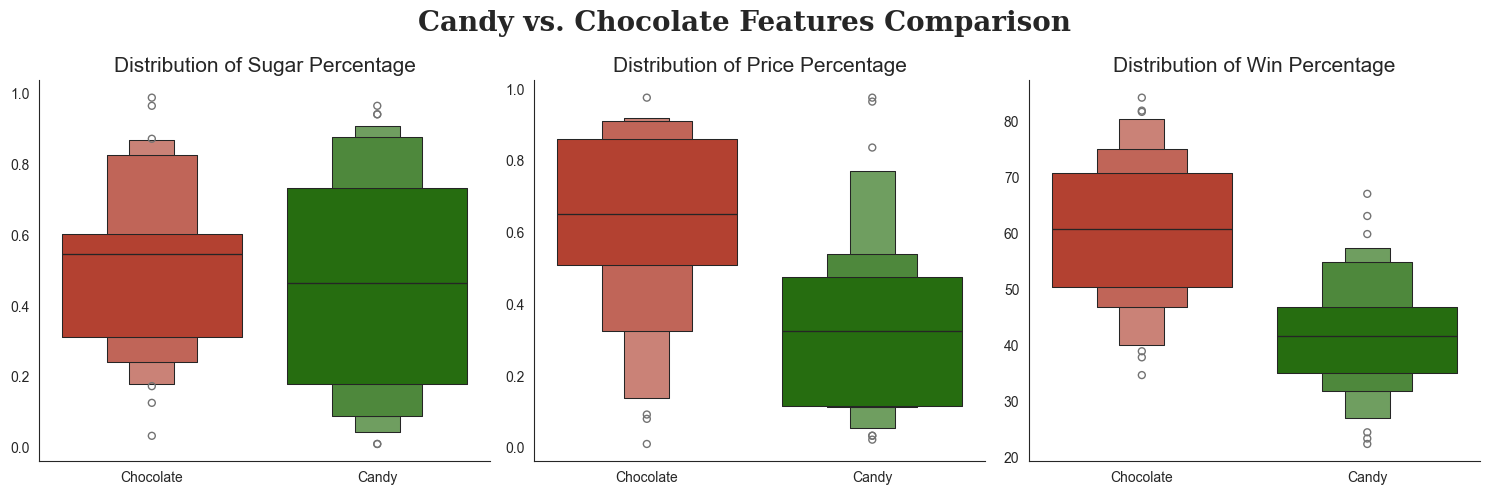

In [334]:
plot_enhanced_boxplots(df)


- 分位数细节（k_depth="trustworthy"）

| 箱体层级 | 包含数据比例 | 分析意义 |
|---------|------------|---------|
| 最宽箱体 | 中间50%（IQR） | 主体分布 |
| 中层箱体 | 中间80% | 主要分布范围 |
| 外层箱体 | 中间95% | 尾部特征 |
| 最外层 | --- | 极端值检测 |

---

##### 观察 | Observation

增强箱型图突出了在含糖量、价格和胜率这三个变量中均存在离群值，表明无论是否含有巧克力，糖果在这些指标上都存在一定的差异性和潜在的极端情况。

这种差异性可能源于多种因素，例如成分构成、营销策略或消费者偏好的不同。

The boxen plot highlights the presence of outliers across all three variables, indicating variability and potential extremes in sugar content, price, and win percentage among candies with and without chocolate.

This variability may stem from various factors such as ingredient composition, marketing strategies, or consumer preferences.

---

#### 3. 建立模型 & 模型估计

---

In [335]:
X = df.drop(["Chocolate", "Candy Name"], axis = 1)
y = df["Chocolate"]


In [336]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


Scalling the Data

- Two popular methods that used popularly to scaling data.
  1. **Z-standardisation**
    - This method transforms the data so that the mean is zero and the standard deviation is one.
  2. **Min-Max Scalling**
    - Min-Max scaling transform the data so that it is between zero & one

In here, we will implement both to see how if this influences model performance.

In [337]:
def min_max_scaling(X, X_train, X_test):
    
    scaler = MinMaxScaler()

    X_train_scaler = scaler.fit_transform(X_train)
    X_test_scaler = scaler.transform(X_test)

    X_train_scaled = pd.DataFrame(X_train_scaler, columns = X.columns)
    X_test_scaled = pd.DataFrame(X_test_scaler, columns = X.columns)

    return X_train_scaled, X_test_scaled

def standard_scaling(X, X_train, X_test):

    scaler = StandardScaler()

    X_train_scaler = scaler.fit_transform(X_train)
    X_test_scaler = scaler.transform(X_test)

    X_train_scaled = pd.DataFrame(X_train_scaler, columns = X.columns)
    X_test_scaled = pd.DataFrame(X_test_scaler, columns = X.columns)

    return X_train_scaled, X_test_scaled
    

In [338]:
X_train_min_max_scaled, X_test_min_max_scaled = min_max_scaling(X, X_train, X_test)
X_train_standard_scaled, X_test_standard_scaled = standard_scaling(X, X_train, X_test)


Standard Scaling `(X Train)`

In [339]:
X_train_standard_scaled.head(5).style.background_gradient(cmap = "viridis")


,Fruity,Caramel,Peanuts & Nuts,Nougat,Crispy,Hard Candy,Candy Bar,Multi-piece,Sugar Percentage,Price Percentage,Win Percentage
0,-0.862316,-0.462910,-0.439298,-0.311086,-0.311086,-0.509175,1.666667,-1.000000,-0.075770,-0.492722,-0.005604
1,-0.862316,-0.462910,2.276361,-0.311086,-0.311086,-0.509175,1.666667,-1.000000,0.427166,1.046221,1.430018
2,1.159667,-0.462910,-0.439298,-0.311086,-0.311086,1.963961,-0.600000,1.000000,0.427166,1.289945,-0.576798
3,1.159667,-0.462910,-0.439298,-0.311086,-0.311086,-0.509175,-0.600000,1.000000,0.890301,0.154888,-0.934162
4,1.159667,-0.462910,-0.439298,-0.311086,-0.311086,1.963961,-0.600000,-1.000000,-1.591815,-1.262193,-0.721467


Min-Max Scaling `(X Train)`

In [340]:
X_train_min_max_scaled.head(5).style.background_gradient(cmap = "viridis")


,Fruity,Caramel,Peanuts & Nuts,Nougat,Crispy,Hard Candy,Candy Bar,Multi-piece,Sugar Percentage,Price Percentage,Win Percentage
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.475891,0.325389,0.440725
1,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.621593,0.783420,0.782220
2,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.621593,0.855959,0.304854
3,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.755765,0.518135,0.219848
4,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.036688,0.096373,0.270442


---

##### 3.1 模型初始化 | Model Initialization


Using the following method to ***predict whether a candy is chocolate or not.***

This is a binary classification task, as candies are either chocolate or not.
Therefore,
- Logistic Regression
  - This method is suitable for this task due to its simplicity and ability to handle binary outcomes.
- Decision Tree
  - This method is another choice as it can capture non-linear relationships in the data.
- K-Nearest Neighbors (KNN) - K近邻算法
  - This method is selected for its simplicity and effectiveness in classification tasks.
- Support Vector Machine (SVM) - 支持向量机
  - This method is chosen as it can handle high-dimensional data well and works effectively in separating classes with a clear margin (清晰边界)


---

In [341]:
models = {
    "Logistic Regression": LogisticRegression(random_state = 42),
    "Decision Tree": DecisionTreeClassifier(random_state = 42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors = 5),
    "Support Vector Machine": SVC(random_state = 42),
}

---

##### 3.2 基于 原始 数据的模型表现 | Model Performance with Unscaled Data

---

In [342]:
def evaluate_unscaled_model(X_train, X_test, y_train, y_test, models):
    """
    评估多个分类模型的性能
    
    参数:
    X_train, y_train: 训练数据
    X_test, y_test: 测试数据
    
    返回:
    DataFrame: 包含模型性能指标的结果表
    """
    results = []

    for name, model in models.items():
        
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        results.append({
            "Model": name,
            "Accuracy": accuracy_score(y_test, preds),
            "Precision": precision_score(y_test, preds),
            "Recall": recall_score(y_test, preds),
            "F1 Score": f1_score(y_test, preds)
        })

    results_df = pd.DataFrame(results).sort_values("Accuracy", ascending = False)

    results_view = results_df.style.format({
        "Accuracy": "{:.2%}",
        "Precision": "{:.2%}",
        "Recall": "{:.2%}",
        "F1 Score": "{:.2%}"
    })
    results_view = results_view.background_gradient(cmap = "viridis")

    return results_df, results_view


In [343]:
result_unscaled, result_unscaled_view = evaluate_unscaled_model(X_train, X_test, y_train, y_test, models)


---

##### 3.3 基于 最小-最大 缩放后的原始数据的表现 | Model Performance with Min-Max Scaled Data

---

In [344]:
def evaluate_min_max_model(X_train, X_test, y_train, y_test, models):
    """
    评估多个分类模型的性能
    
    参数:
    X_train, y_train: 训练数据
    X_test, y_test: 测试数据
    
    返回:
    DataFrame: 包含模型性能指标的结果表
    """
    results = []

    for name, model in models.items():
        
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        results.append({
            "Model": name,
            "Accuracy": accuracy_score(y_test, preds),
            "Precision": precision_score(y_test, preds),
            "Recall": recall_score(y_test, preds),
            "F1 Score": f1_score(y_test, preds)
        })

    results_df = pd.DataFrame(results).sort_values("Accuracy", ascending = False)

    results_view = results_df.style.format({
        "Accuracy": "{:.2%}",
        "Precision": "{:.2%}",
        "Recall": "{:.2%}",
        "F1 Score": "{:.2%}"
    })
    results_view = results_view.background_gradient(cmap = "viridis")

    return results_df, results_view


In [345]:
result_min_max, result_min_max_view = evaluate_min_max_model(X_train_min_max_scaled, X_test_min_max_scaled, y_train, y_test, models)


---

##### 3.4 基于 标准化 缩放后原始数据的表现 | Model Performance with Standard Scaled Data

---

In [346]:
def evaluate_standardized_model(X_train, X_test, y_train, y_test, models):
    """
    评估多个分类模型的性能
    
    参数:
    X_train, y_train: 训练数据
    X_test, y_test: 测试数据
    
    返回:
    DataFrame: 包含模型性能指标的结果表
    """
    results = []

    for name, model in models.items():
        
        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        results.append({
            "Model": name,
            "Accuracy": accuracy_score(y_test, preds),
            "Precision": precision_score(y_test, preds),
            "Recall": recall_score(y_test, preds),
            "F1 Score": f1_score(y_test, preds)
        })

    results_df = pd.DataFrame(results).sort_values("Accuracy", ascending = False)

    results_view = results_df.style.format({
        "Accuracy": "{:.2%}",
        "Precision": "{:.2%}",
        "Recall": "{:.2%}",
        "F1 Score": "{:.2%}"
    })
    results_view = results_view.background_gradient(cmap = "viridis")

    return results_df, results_view


In [347]:
result_standardized, result_standardized_view = evaluate_standardized_model(X_train_standard_scaled, X_test_standard_scaled, y_train, y_test, models)


---

In [348]:
display(result_unscaled_view)
display(result_min_max_view)
display(result_standardized_view)

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,88.24%,87.50%,87.50%,87.50%
1,Decision Tree,88.24%,87.50%,87.50%,87.50%
3,Support Vector Machine,76.47%,70.00%,87.50%,77.78%
2,K-Nearest Neighbors,64.71%,66.67%,50.00%,57.14%


,Model,Accuracy,Precision,Recall,F1 Score
3,Support Vector Machine,94.12%,100.00%,87.50%,93.33%
2,K-Nearest Neighbors,94.12%,100.00%,87.50%,93.33%
1,Decision Tree,88.24%,87.50%,87.50%,87.50%
0,Logistic Regression,88.24%,100.00%,75.00%,85.71%


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,94.12%,100.00%,87.50%,93.33%
1,Decision Tree,88.24%,87.50%,87.50%,87.50%
2,K-Nearest Neighbors,88.24%,100.00%,75.00%,85.71%
3,Support Vector Machine,88.24%,100.00%,75.00%,85.71%


---

##### 发现 | Finding

Our analysis reveals that the Min-Max scaled data consistently outperforms the unscaled data across all metrics. Additionally, the Min-Max scaled data generally outperforms the Standard scaled data for most models.

From out observations, we derive the following insights:
1. Logistics Regression performs best with Standard scaled data;
2. While, KNN and SVM performs best with Min-Max scaled data;
3. Decision Tree model remains uneffected by both scaled data.


---

##### 3.5 选择模型 | Model Selection

Based on standardized data, we will compare different models to choose the best one for predicting chocolate in candies.

The main focus will be on overall performance, especially achieving high f1 score.

Simpler models will be prefered as they are easier to understand and maintain.

This ensures that the chosen model is both effective and practical for real-word use.

---

In [349]:
def plot_confusion_matrix(models, X_train, y_train, X_test, y_test):
    """
    绘制所有模型的混淆矩阵网格图
    
    参数:
    models (dict): 模型字典 {名称: 模型实例}
    X_train, y_train: 训练数据
    X_test, y_test: 测试数据
    """

    fig, axes = plt.subplots(2, 2, figsize = (12, 10))
    axes = axes.flatten()

    group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
    labels = ["Actual Negative", "Actual Positive"]

    for i, (name, model) in enumerate(models.items()):

        ax = axes[i]

        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        cm = confusion_matrix(y_test, preds)

        counts = [f"{x:.0f}" for x in cm.flatten()]
        percents = [f"{x:.1%}" for x in cm.flatten() / cm.sum()]
        annotations = [f"{n}\n\n{c}\n\n{p}" for n, c, p in zip(group_names, counts, percents)]
        annotations = np.array(annotations).reshape(2, 2)

        sns.heatmap(
            cm, annot = annotations, fmt = "", cmap = "viridis",
            linewidths = 5, cbar = False,
            xticklabels = ["Predicted Negative", "Predicted Positive"],
            yticklabels = labels,
            ax = ax,
            annot_kws = {"size": 15}
        )

        ax.set_title(name, fontsize = 13, fontfamily = "serif", pad = 10)
        ax.tick_params(axis = "both", which = "both", length = 0)

    plt.suptitle("Confusion Matrix for All Models", fontsize = 20, fontweight = "bold", fontfamily = "serif", y = 1)
    plt.tight_layout()
    plt.show()


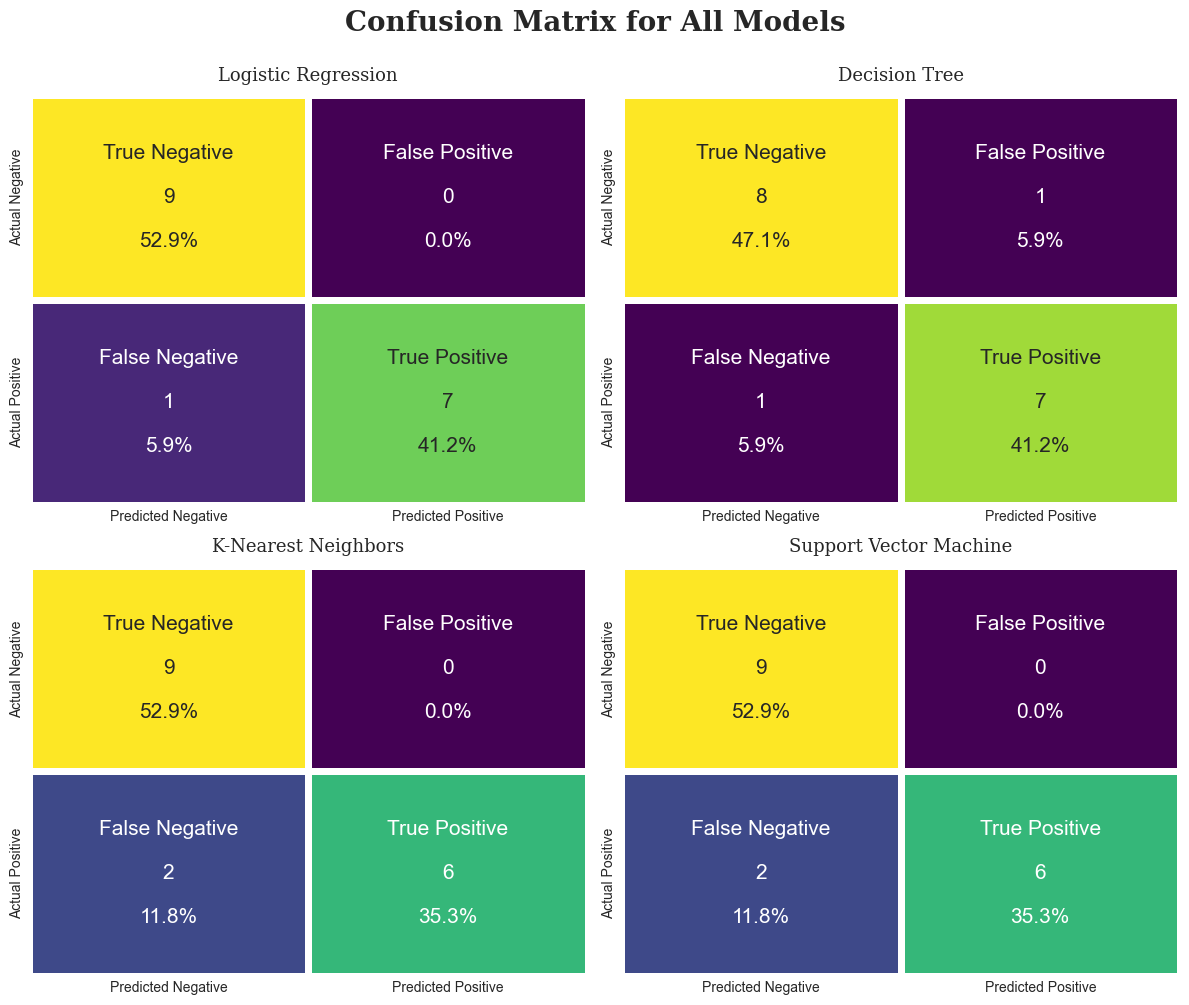

In [350]:
plot_confusion_matrix(models, X_train_standard_scaled, y_train, X_test_standard_scaled, y_test)


---

##### 发现 | Findings



Our model aimed at predicting whether a candy is chocolate-based or not, the confusion matrix provides valuable insights into the model's performance.

With a total of 17 candies tested, the matrix reveals:
1. All models achieved high accuracy, ranging from 88.24% to 94.12%;
2. Logistic Regression achieved the highest accuracy (94.12%), with the fewest misclassificatioins;
3. Decision Tree, K-Nearest Neighbors, and SVM showed slightly lower accyracuies (88.24%), with similar confusion patterns;
4. Overall, these models demonstrates good performance in distringuishing between chocolates and non-chocolates, with Logistic Regression being the most effectve among them.

---

In [351]:
def plot_model_comparison(df):
    """
    绘制模型性能对比图
    
    参数:
    scores_df (DataFrame): 包含模型性能得分的DataFrame
    """
    model_colors = {
        "Support Vector Machine": "#fc6603",
        "K-Nearest Neighbors": "#f7904d",
        "Decision Tree": "#b8784f",
        "Logistic Regression": "#451e03"
    }

    fig, axes = plt.subplots(2, 2, figsize = (16, 8), dpi = 300)
    metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]

    for i, metric in enumerate(metrics):

        ax = axes[i // 2, i % 2]

        bars = ax.barh(
            df["Model"],
            df[metric],
            color = [model_colors[model] for model in df["Model"]],
            edgecolor = "black",
            linewidth = 1,
            height = 0.7
        )

        for bar in bars:

            ax.annotate(
                f"{bar.get_width():.1%}",
                (bar.get_width() - 0.05, bar.get_y() + bar.get_height() / 2),
                va = "center", ha = "right",
                fontsize = 15, fontweight = "bold", color = "white", fontfamily = "serif"
            )

        ax.set_xlim(0, 1)
        ax.set_title(f"{metric}", fontsize = 15, fontweight = "bold", fontfamily = "serif")
        ax.set_xlabel("")
        ax.tick_params(axis = "x", length = 0, labelbottom = False) # 不显示x轴刻度线，不显示刻度值
        ax.tick_params(axis = "y", labelsize = 15)
        ax.spines[:].set_visible(False)
        ax.spines['left'].set_visible(True)

    fig.suptitle("Comparative Analysis of Models", fontsize = 20, fontweight = "bold", fontfamily = "serif", y = 1)
    
    plt.tight_layout()
    plt.show()


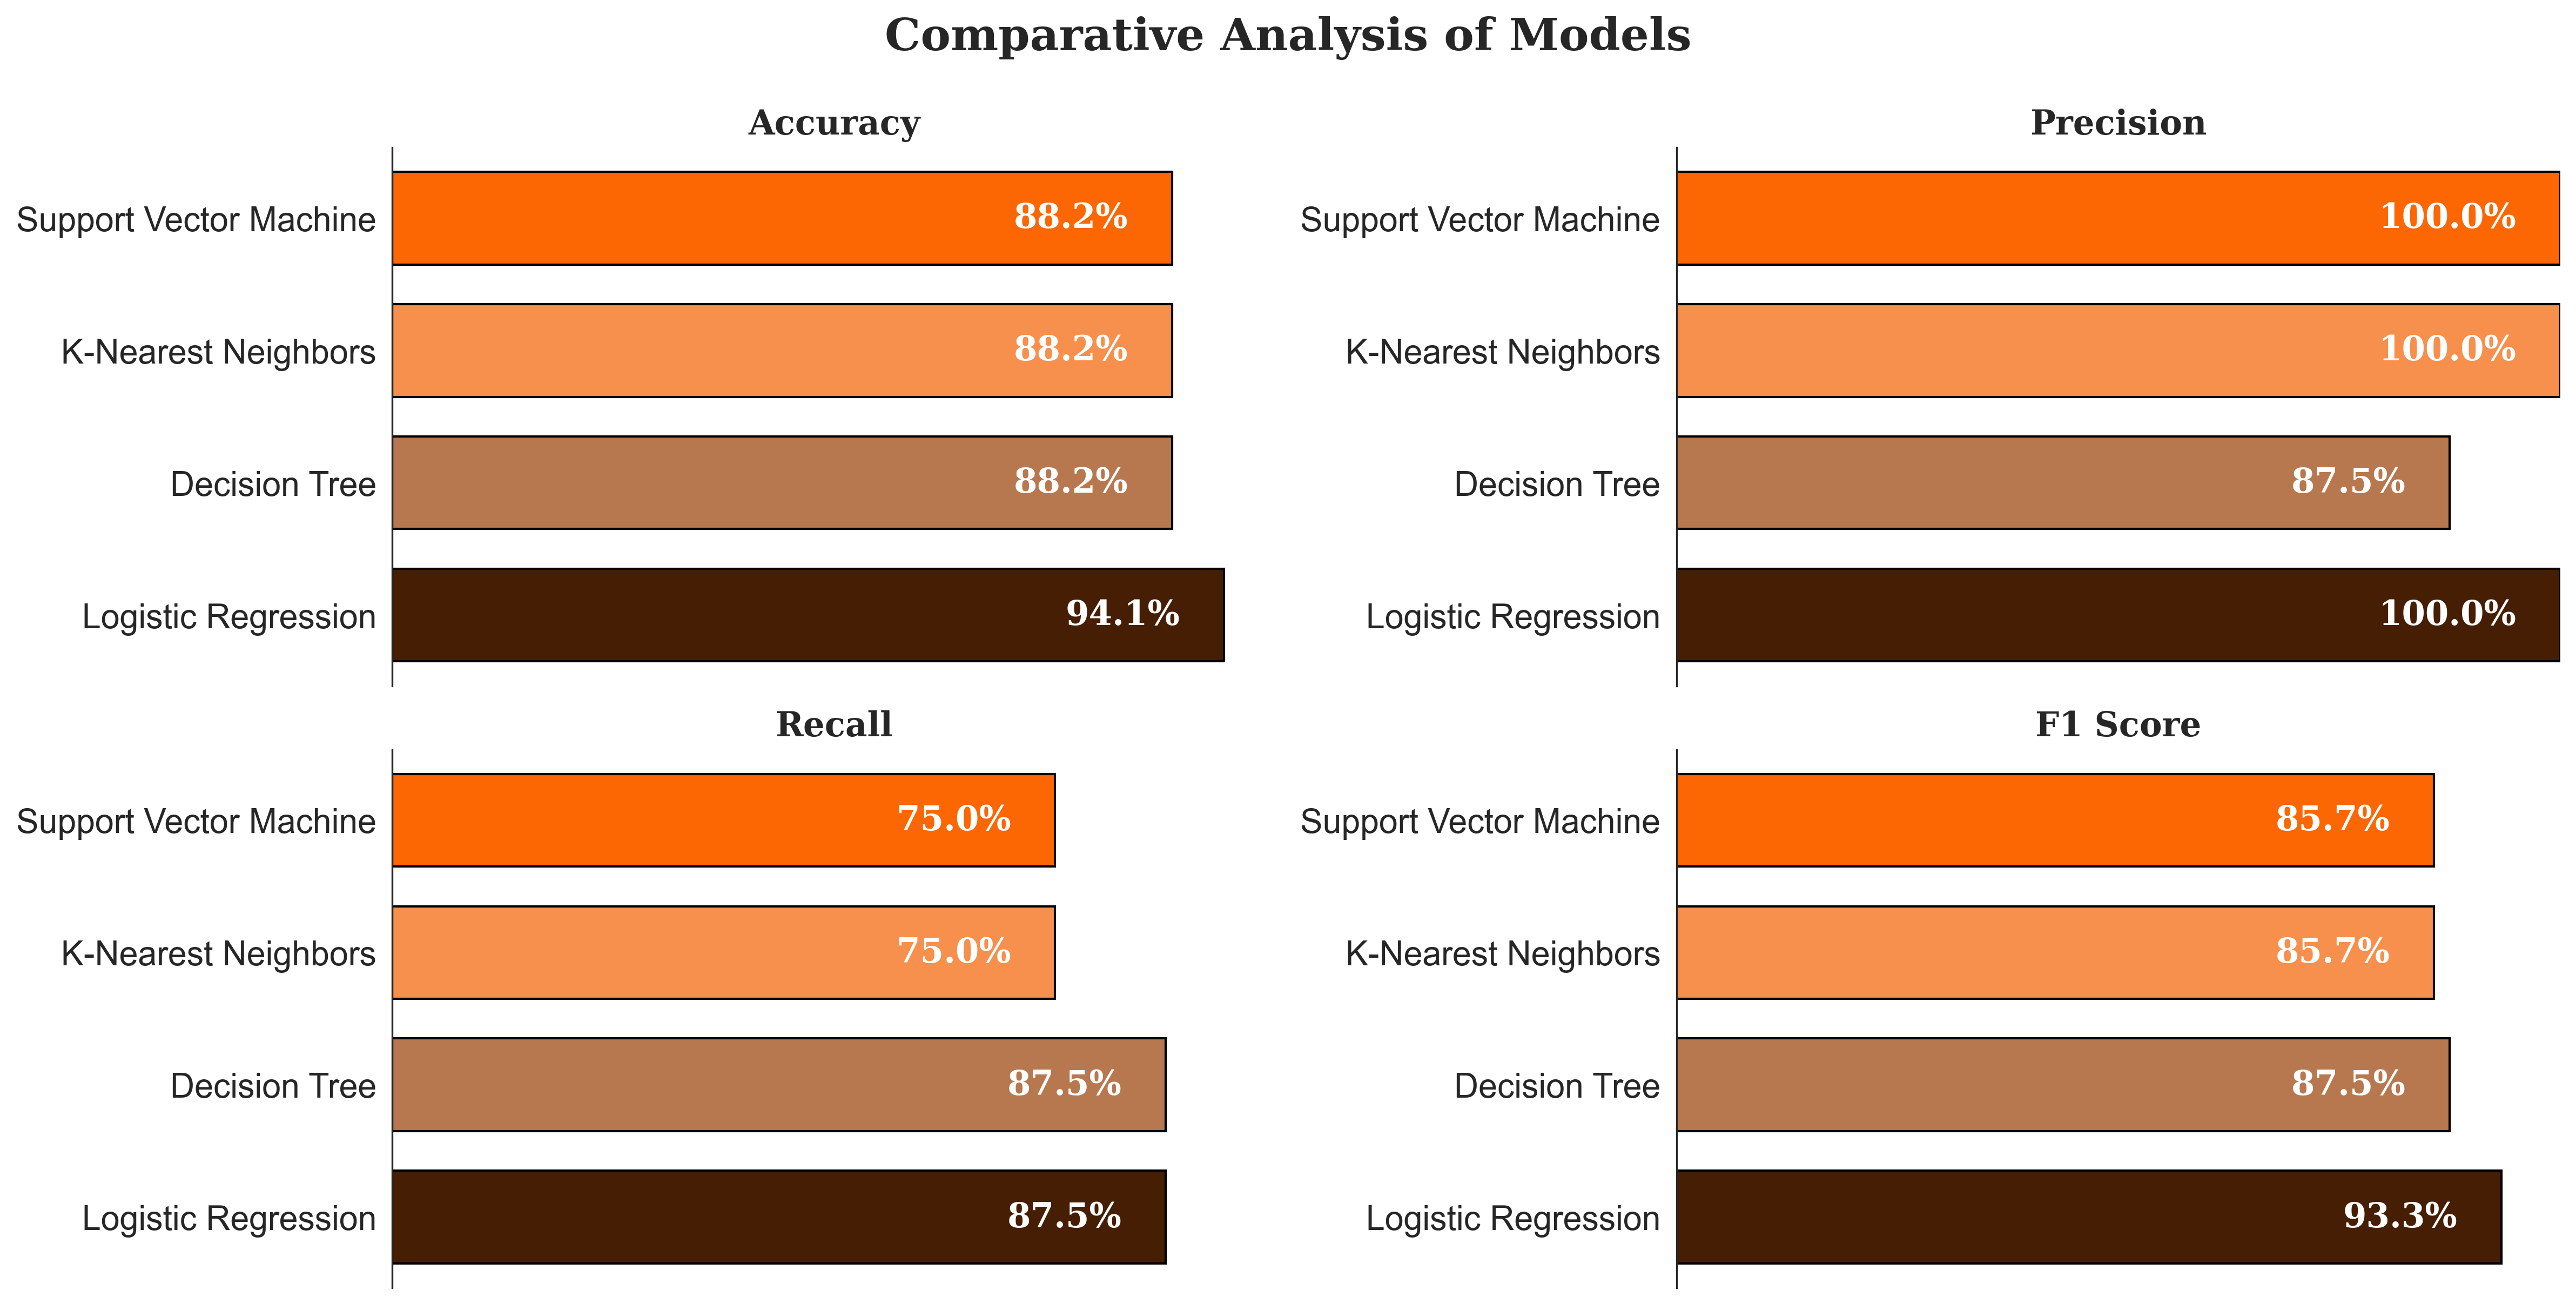

In [352]:
plot_model_comparison(result_standardized)


---

##### 发现 | Findings

- **Logistic Regression**
  - It achieved the highest accuracy of 94.12%, along with perfect precision of 100% and a high recall of 87.5%. Its F1 score, which combine precision and recall, is also high at 93.33%
- **Decision Tree**
  - This had an accuracy of 88.24%, with precision and recall both at 87.5%. Its F1 score is allso 87.5%
- **K-Nearest Neighbors** & **SVM** 
  - They both achieved the same accuracy, precision, recall, and F1 score of 88.24%. They also have perfect precision, but their recall is lower compared to Logistic Regression and Decision Tree

After thorough evaluation of multiple performance metrics, including accuracy, precision, recall, and F1 score, as well as examination of confusion matrices, the ***Logistic Regression Model*** emerges as the top performing model.

With the highest accuracy and F1 score among all models, Logistic Regression demonstrates superior performance in classifying chocolates and candies accurately.

Moreover, considering the simplicity and efficiency of the Logistic Regression algorithm, it not only achieves remarkable accuracy but also offers computational efficiency and ease of interpretation. Therefore, based on its exceptional performance and practical advantages, we confidently select the ***Logistic Regression model as our final model*** for the binary classification task of distinguishing between chocolates and non-chocolates."

---

In [353]:
def get_Logistic_Regression_Details(X_train, y_train):
    
    model = LogisticRegression(random_state = 5)
    model.fit(X_train, y_train)

    feature_names = X_train.columns.tolist()

    coefficients = model.coef_[0]
    intercept = model.intercept_[0]

    weights_df = pd.DataFrame({
        "Feature": feature_names,
        "Weight": coefficients
    }).sort_values(by = "Weight", ascending = False)

    linear_terms = [f"{coef:.4f}*{feat}" for coef, feat in zip(coefficients, feature_names)]
    linear_expression = " + ".join(linear_terms)
    sigmoid_function = f"P(y = 1) = 1 / (1 + exp(-({intercept:.4f} + {linear_expression})))"

    return {
        "Model": "Logistic Regression",
        "intercept": intercept,
        "weights_df": weights_df,
        "sigmoid_function": sigmoid_function,
        "Classification_Threshold": 0.5
    }


In [354]:
get_Logistic_Regression_Details(X_train_standard_scaled, y_train)


{'Model': 'Logistic Regression',
 'intercept': np.float64(-0.30605809703155334),
 'weights_df':              Feature    Weight
 10    Win Percentage  1.543455
 6          Candy Bar  0.685896
 4             Crispy  0.418076
 9   Price Percentage  0.372173
 5         Hard Candy  0.018899
 7        Multi-piece -0.070723
 8   Sugar Percentage -0.146435
 1            Caramel -0.166629
 2     Peanuts & Nuts -0.210347
 3             Nougat -0.336299
 0             Fruity -1.405869,
 'sigmoid_function': 'P(y = 1) = 1 / (1 + exp(-(-0.3061 + -1.4059*Fruity + -0.1666*Caramel + -0.2103*Peanuts & Nuts + -0.3363*Nougat + 0.4181*Crispy + 0.0189*Hard Candy + 0.6859*Candy Bar + -0.0707*Multi-piece + -0.1464*Sugar Percentage + 0.3722*Price Percentage + 1.5435*Win Percentage)))',
 'Classification_Threshold': 0.5}

$$\normalsize z = -0.3061 - 1.4059\times\text{Fruity} - 0.1666\times\text{Caramel} - 0.2103\times\text{Peanuts \& Nuts} - 0.3363\times\text{Nougat} \\ 
+ 0.4181\times\text{Crispy} + 0.0189\times\text{Hard Candy} + 0.6859\times\text{Candy Bar} - 0.0707\times\text{Multi-piece} \\
 - 0.1464\times\text{Sugar Percentage} + 0.3722\times\text{Price Percentage} + 1.5435\times\text{Win Percentage}$$

$$$$

$$P(y = 1) = \frac{1}{1 + e^{-z}}$$

##### 测试 | Testing

In [ ]:
# #!Uncomment the code below to get user input and make predictions

# model =  LogisticRegression(random_state=46)
# # Initialize the chosen model
# model.fit(X_train_standard_scaled, y_train)
# model.predict(X_test_standard_scaled)

# def predict_Chocolate():
#     print("Enter candy features:")
#     Fruity_Flavor = int(input("Fruity Flavor (0 or 1): "))
#     Caramel = int(input("Caramel (0 or 1): "))
#     Peanuts_nuts = int(input("Peanuts & nuts (0 or 1): "))
#     Nougat = int(input("Nougat (0 or 1): "))
#     Crispy = int(input("Crispy (0 or 1): "))
#     Hard_candy = int(input("Hard candy (0 or 1): "))
#     Candy_bar = int(input("Candy bar (0 or 1): "))
#     Multi_piece = int(input("Multi-piece (0 or 1): "))
#     Sugar_Percentage = float(input("Sugar Percent (0.0-1.0): "))
#     Price_Percentage = float(input("Price Percent (0.0-1.0): "))
#     Win_Percentage = float(input("Win Percent (0-100): "))
    
#     # Print entered features
#     print("\nEntered Features:")
#     print("Fruity Flavor:", Fruity_Flavor)
#     print("Caramel:", Caramel)
#     print("Peanuts & nuts:", Peanuts_nuts)
#     print("Nougat:", Nougat)
#     print("Crispy:", Crispy)
#     print("Hard candy:", Hard_candy)
#     print("Candy bar:", Candy_bar)
#     print("Multi-piece:", Multi_piece)
#     print("Sugar Percent:", Sugar_Percentage)
#     print("Price Percent:", Price_Percentage)
#     print("Win Percent:", Win_Percentage)
    
#     input_data = [[Fruity_Flavor, Caramel, Peanuts_nuts, Nougat, Crispy, Hard_candy, Candy_bar, Multi_piece, Sugar_Percentage, Price_Percentage, Win_Percentage]]
#     prediction = model.predict(input_data)
    
#     if prediction[0] == 1:
#         print("\nThis candy is predicted to be Chocolate.")
#     else:
#         print("\nThis candy is predicted not to be Chocolate.")

# # Call the function to get user input and make predictions
# predict_Chocolate()